# Hierarchical Agglomerative Clustering (HAC)

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd

from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
from scipy.spatial.distance import euclidean

from matplotlib import pyplot as plt

In [2]:
X = np.array([[0.1,   2.5],
              [1.5,   .4 ],
              [0.3,   1  ],
              [1  ,   .8 ],
              [0.5,   0  ],
              [0  ,   0.5],
              [0.5,   0.5],
              [2.7,   2  ],
              [2.2,   3.1],
              [3  ,   2  ],
              [3.2,   1.3]])

In [3]:
X.shape

(11, 2)

In [4]:
df = pd.DataFrame(X, columns=[ 'X1', 'X2' ])
df

,X1,X2
0,0.1,2.5
1,1.5,0.4
2,0.3,1.0
3,1.0,0.8
4,0.5,0.0
5,0.0,0.5
6,0.5,0.5
7,2.7,2.0
8,2.2,3.1
9,3.0,2.0


In [5]:
hc_single = linkage(X, method="single")
pd.DataFrame(hc_single, columns = ['idx1', 'idx2', 'dist', 'sample_count'])

,idx1,idx2,dist,sample_count
0,7.0,9.0,0.300000,2.0
1,4.0,6.0,0.500000,2.0
2,5.0,12.0,0.500000,3.0
3,2.0,13.0,0.538516,4.0
4,3.0,14.0,0.583095,5.0
5,1.0,15.0,0.640312,6.0
6,10.0,11.0,0.728011,3.0
7,8.0,17.0,1.208305,4.0
8,0.0,16.0,1.513275,7.0
9,18.0,19.0,1.923538,11.0


### In its first iteration the linkage algorithm decided to merge the two clusters (original samples here) with indices 7 and 9, as they only had a distance of 0.3. This created a cluster with a total of 2 samples.

In [6]:
# 0: [  7.        ,   9.        ,   0.3       ,   2.        ]
euclidean(X[7], X[9])

0.2999999999999998

In [7]:
# 1: [  4.        ,   6.        ,   0.5       ,   2.        ]
euclidean(X[4], X[6])

0.5

In [8]:
X[:, 0]

array([ 0.1,  1.5,  0.3,  1. ,  0.5,  0. ,  0.5,  2.7,  2.2,  3. ,  3.2])

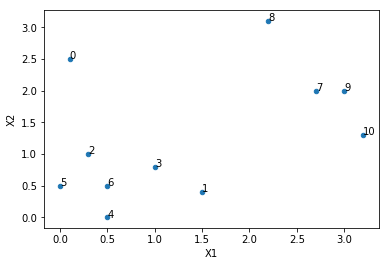

In [9]:
fig, ax = plt.subplots()
df.plot(kind='scatter', x='X1', y='X2', ax=ax)
for i, point in df.iterrows():
        ax.text(point['X1'], point['X2'], df.index[i])

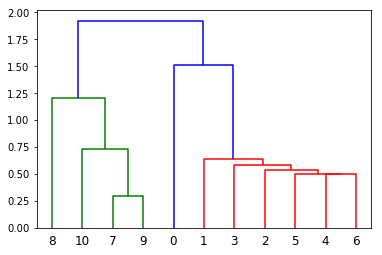

In [10]:
dendrogram(hc_single)
plt.show()

## Cut Tree

In [11]:
cut_tree(hc_single, n_clusters=2)

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1]])

In [12]:
cut_tree(hc_single, n_clusters=3)

array([[0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [2],
       [2],
       [2],
       [2]])

In [13]:
cut_tree(hc_single, n_clusters=4)

array([[0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [2],
       [3],
       [2],
       [2]])

## Methods

### Single
$$ d(u,v) = \min (dist( u[i], v[j] )) $$

In [14]:
hc_single = linkage(X, method="single")
pd.DataFrame(hc_single, columns = ['idx1', 'idx2', 'dist', 'sample_count'])

,idx1,idx2,dist,sample_count
0,7.0,9.0,0.300000,2.0
1,4.0,6.0,0.500000,2.0
2,5.0,12.0,0.500000,3.0
3,2.0,13.0,0.538516,4.0
4,3.0,14.0,0.583095,5.0
5,1.0,15.0,0.640312,6.0
6,10.0,11.0,0.728011,3.0
7,8.0,17.0,1.208305,4.0
8,0.0,16.0,1.513275,7.0
9,18.0,19.0,1.923538,11.0


### Complete
$$ d(u, v) = \max(dist(u[i],v[j])) $$

In [15]:
hc_complete = linkage(X, method="complete")
pd.DataFrame(hc_complete, columns = ['idx1', 'idx2', 'dist', 'sample_count'])

,idx1,idx2,dist,sample_count
0,7.0,9.0,0.300000,2.0
1,4.0,6.0,0.500000,2.0
2,2.0,5.0,0.583095,2.0
3,1.0,3.0,0.640312,2.0
4,10.0,11.0,0.860233,3.0
5,12.0,13.0,1.019804,4.0
6,14.0,16.0,1.503330,6.0
7,8.0,15.0,2.059126,4.0
8,0.0,17.0,2.531798,7.0
9,18.0,19.0,3.535534,11.0


### Average
$$d(u,v) = \sum_{ij} \frac{d(u[i], v[j])} {(|u|*|v|)}$$

In [16]:
hc_average = linkage(X, method="average")
pd.DataFrame(hc_average, columns = ['idx1', 'idx2', 'dist', 'sample_count'])

,idx1,idx2,dist,sample_count
0,7.0,9.0,0.300000,2.0
1,4.0,6.0,0.500000,2.0
2,2.0,5.0,0.583095,2.0
3,1.0,3.0,0.640312,2.0
4,12.0,13.0,0.691357,4.0
5,10.0,11.0,0.794122,3.0
6,14.0,15.0,1.028191,6.0
7,8.0,16.0,1.542526,4.0
8,0.0,17.0,2.089100,7.0
9,18.0,19.0,2.780343,11.0


### Weighted

$$ d(u,v) = (dist(s,v) + dist(t,v)) / 2 $$

In [17]:
hc_ward = linkage(X, method="ward")
pd.DataFrame(hc_ward, columns = ['idx1', 'idx2', 'dist', 'sample_count'])

,idx1,idx2,dist,sample_count
0,7.0,9.0,0.300000,2.0
1,4.0,6.0,0.500000,2.0
2,2.0,5.0,0.583095,2.0
3,1.0,3.0,0.640312,2.0
4,12.0,13.0,0.863134,4.0
5,10.0,11.0,0.903696,3.0
6,14.0,15.0,1.519320,6.0
7,8.0,16.0,1.883702,4.0
8,0.0,17.0,2.667976,7.0
9,18.0,19.0,5.784221,11.0


### Centroid
$$ dist(s,t) = ||c_s-c_t||_2  $$

In [18]:
hc_centroid = linkage(X, method="centroid")
pd.DataFrame(hc_centroid, columns = ['idx1', 'idx2', 'dist', 'sample_count'])

,idx1,idx2,dist,sample_count
0,7.0,9.0,0.300000,2.0
1,4.0,6.0,0.500000,2.0
2,5.0,12.0,0.559017,3.0
3,1.0,3.0,0.640312,2.0
4,2.0,13.0,0.667499,4.0
5,10.0,11.0,0.782624,3.0
6,14.0,15.0,0.930390,6.0
7,8.0,16.0,1.538036,4.0
8,0.0,17.0,2.037700,7.0
9,18.0,19.0,2.563582,11.0


### Median
assigns `d(s,t)` like the ``centroid`` method.

In [19]:
hc_median = linkage(X, method="median")
pd.DataFrame(hc_median, columns = ['idx1', 'idx2', 'dist', 'sample_count'])

,idx1,idx2,dist,sample_count
0,7.0,9.0,0.300000,2.0
1,4.0,6.0,0.500000,2.0
2,5.0,12.0,0.559017,3.0
3,2.0,13.0,0.626997,4.0
4,1.0,3.0,0.640312,2.0
5,10.0,11.0,0.782624,3.0
6,14.0,15.0,0.978918,6.0
7,8.0,16.0,1.668270,4.0
8,0.0,17.0,1.970931,7.0
9,18.0,19.0,2.324406,11.0


### Ward - Uses the Ward variance minimization algorithm.

$$ d(u,v) = \sqrt{\frac{|v|+|s|}
                           {T}d(v,s)^2
                    + \frac{|v|+|t|}
                           {T}d(v,t)^2
                    - \frac{|v|}
                           {T}d(s,t)^2}
$$

In [20]:
hc_ward = linkage(X, method="ward")
pd.DataFrame(hc_ward, columns = ['idx1', 'idx2', 'dist', 'sample_count'])

,idx1,idx2,dist,sample_count
0,7.0,9.0,0.300000,2.0
1,4.0,6.0,0.500000,2.0
2,2.0,5.0,0.583095,2.0
3,1.0,3.0,0.640312,2.0
4,12.0,13.0,0.863134,4.0
5,10.0,11.0,0.903696,3.0
6,14.0,15.0,1.519320,6.0
7,8.0,16.0,1.883702,4.0
8,0.0,17.0,2.667976,7.0
9,18.0,19.0,5.784221,11.0
